In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.io import loadmat

In [3]:
# for probability density functions
from scipy import stats

In [4]:
# part 1 

In [5]:
# load data

path = "D:\Programming\TestData\ex8data1.mat"

data = loadmat(path)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [6]:
X, Xval, yval = data['X'], data['Xval'], data['yval']
X.shape, Xval.shape, yval.shape

((307, 2), (307, 2), (307, 1))

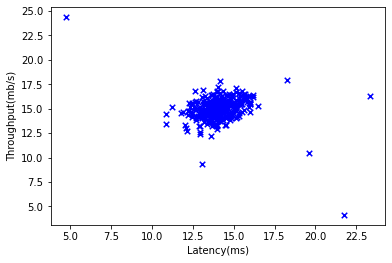

In [7]:
# plot data

fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel('Latency(ms)')
ax.set_ylabel('Throughput(mb/s)')
ax.scatter([X[:,0]], [X[:,1]], marker = 'x', s=30, color='b')

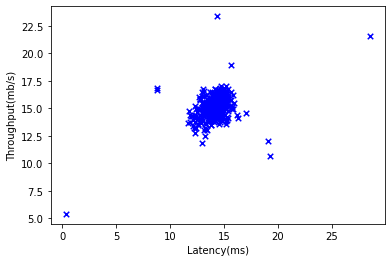

In [10]:
# plot Xval data

fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel('Latency(ms)')
ax.set_ylabel('Throughput(mb/s)')
ax.scatter([Xval[:,0]], [Xval[:,1]], marker = 'x', s=30, color='b')

In [11]:
# estimate dataset statistics

In [12]:
def estimateGaussian(X):
    
    # mu = X.mean(axis = 0)
    # sigma2 = X.var(axis = 0)
    
    # alternate
    
    mu = np.mean(X, axis = 0)
    sigma2 = np.var(X, axis = 0)
    
    return mu, sigma2

In [13]:
mu, sigma2 = estimateGaussian(X)
mu, sigma2

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [14]:
# calcutalte pdf (probability density functions) for X, Xval
# using inbuilt methods from scipy.stats

In [15]:
# compute the probability that each element of X belongs to the 'normal' distribution
# defined by mu and sigma2
# i.e. the probability density function for all elements of X

m,n = X.shape

p = np.zeros((m,n))
p[:,0] = stats.norm(mu[0], sigma2[0]).pdf(X[:,0])
p[:,1] = stats.norm(mu[1], sigma2[1]).pdf(X[:,1])
p.shape

(307, 2)

In [16]:
# note - 
# above we calculated the probability that each of the instances of X belong to the 'normal' distribution 
# that we defined earlier by calculating the mean and variance for each dimension. 
# Essentially it's computing how far each instance is from the mean and 
# how that compares to the "typical" distance from the mean for this data.

In [17]:
# repeat for Xval

In [18]:
# compute the probability that each element of Xval belongs to the distribution
# defined by mu and sigma2
# i.e. the probability density function for all elements of Xval

mval,nval = Xval.shape

pval = np.zeros((mval,nval))
pval[:,0] = stats.norm(mu[0], sigma2[0]).pdf(Xval[:,0])
pval[:,1] = stats.norm(mu[1], sigma2[1]).pdf(Xval[:,1])
pval.shape

(307, 2)

In [19]:
# select threshold value epsilon to benchmark predictions (p, pval)
# use cross validation set to determine epsilon value

def selectThreshold(yval, pval):
    
    """
    F1 score = 2 * (precision * recall) / (precision + recall)
    precision = truePositives / (truePositives + falsePositives)
    recall = truePositives / (truePositives + falseNegatives)

    yval == 1, => actual anomaly
    pval < epsilon, => predicted anomaly, i.e. predicting yval is 1
    """
    
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    
    step = (pval.max() - pval.min()) / 1000
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        prediction = (pval < epsilon) 
        truePositives  = np.sum(np.logical_and(prediction == 1, yval == 1)).astype(float)
        falsePositives = np.sum(np.logical_and(prediction == 1, yval == 0)).astype(float)
        falseNegatives = np.sum(np.logical_and(prediction == 0, yval == 1)).astype(float)
        
        precision = truePositives / (truePositives + falsePositives)
        recall    = truePositives / (truePositives + falseNegatives)
        
        F1 = 2 * (precision * recall) / (precision + recall)
        
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
        
    
    return bestEpsilon, bestF1

In [21]:
# compute best value for epsilon and F1

epsilon, F1 = selectThreshold(yval, pval)
epsilon, F1

<ipython-input-19-f7a1fc4cec8f>:27: RuntimeWarning: invalid value encountered in double_scalars
  precision = truePositives / (truePositives + falsePositives)


(0.009566706005956842, 0.7142857142857143)

In [22]:
# find outliers i.e elements of X, where p(X) < epsilon

outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

In [23]:
# Nr of predicted outliers

np.sum(p < epsilon)

8

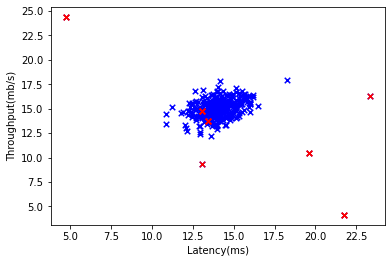

In [25]:
# plot outliers i.e elements of X, where p(X) < epsilon

fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel('Latency(ms)')
ax.set_ylabel('Throughput(mb/s)')

ax.scatter([X[:,0]], [X[:,1]], marker = 'x', s=30, color='b')
ax.scatter([X[outliers,0]], [X[outliers,1]], marker = 'x', s=30, color='r')


In [26]:
# part 2

In [31]:
path = "D:\Programming\TestData\ex8data2.mat"

data = loadmat(path)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [32]:
X, Xval, yval = data['X'], data['Xval'], data['yval']
X.shape, Xval.shape, yval.shape

((1000, 11), (100, 11), (100, 1))

In [33]:
# estimate new dataset statistics - mean and vaiance

mu, sigma2 = estimateGaussian(X)
mu, sigma2

(array([  4.93940034,  -9.63726819,  13.81470749, -10.4644888 ,
         -7.95622922,  10.19950372,  -6.01940755,   7.96982896,
         -6.2531819 ,   2.32451289,   8.47372252]),
 array([60.97489373, 53.20572186, 58.51546272, 84.20403725, 65.26859177,
        89.57487757, 55.63349911, 87.16233783, 29.62926829, 70.7852052 ,
        50.50356719]))

In [34]:
# cmpute probability density functions for X and X val

m,n = X.shape

p = np.zeros((m,n))
p = stats.norm(mu, sigma2).pdf(X)
p.shape

(1000, 11)

In [46]:
m,n = Xval.shape

pval = np.zeros((m,n))
pval = stats.norm(mu, sigma2).pdf(Xval)
pval.shape

(100, 11)

In [36]:
# compute the best threshold value for epsilon

epsilon, F1 = selectThreshold(yval, pval)
epsilon, F1

<ipython-input-19-f7a1fc4cec8f>:27: RuntimeWarning: invalid value encountered in double_scalars
  precision = truePositives / (truePositives + falsePositives)


(0.012420382026040781, 0.18749999999999997)